In [1]:
import plaidml.keras
plaidml.keras.install_backend()

In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout,LeakyReLU,BatchNormalization,MaxPool2D
from keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn import preprocessing as sk

In [3]:
raw = pd.read_csv("training.csv")

In [4]:
raw.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [51]:
raw.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,...,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,...,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,...,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,...,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [6]:
raw.fillna(method = "ffill",inplace=True)
raw.isnull().any().value_counts()

False    31
dtype: int64

In [7]:
raw.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,...,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,...,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,...,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,...,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [8]:
images = []
for i in range(0,7049):
    img = raw["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    images.append(img)

In [9]:
images = np.array(images,dtype='float')
images.shape

(7049, 9216)

In [10]:
images

array([[238., 236., 237., ...,  70.,  75.,  90.],
       [219., 215., 204., ...,   1.,   1.,   1.],
       [144., 142., 159., ...,  78.,  78.,  77.],
       ...,
       [ 74.,  74.,  74., ...,  20.,  20.,  20.],
       [254., 254., 254., ..., 254., 254., 254.],
       [ 53.,  62.,  67., ..., 158., 158., 159.]])

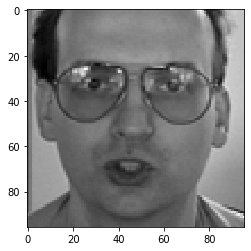

In [11]:
xtrain = images.reshape(-1,96,96)
plt.imshow(xtrain[6].reshape(96,96),cmap='gray')
plt.show()

In [12]:
for row in images:
    row/=255
images

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118],
       [0.85882353, 0.84313725, 0.8       , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.56470588, 0.55686275, 0.62352941, ..., 0.30588235, 0.30588235,
        0.30196078],
       ...,
       [0.29019608, 0.29019608, 0.29019608, ..., 0.07843137, 0.07843137,
        0.07843137],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.20784314, 0.24313725, 0.2627451 , ..., 0.61960784, 0.61960784,
        0.62352941]])

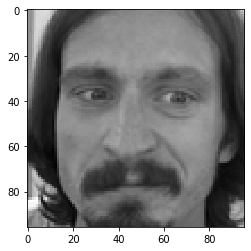

In [13]:
plt.imshow(images[4].reshape(96,96),cmap='gray')
plt.show()

In [14]:
training = raw.drop(["Image"],axis=1)
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [15]:
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
ytrain = np.array(y_train,dtype = 'float')

In [16]:
model = Sequential()
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(96, 96, 1)))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(30, activation='softmax'))
model.add(Convolution2D(32, (3, 3) ,activation='relu', input_shape=(96, 96, 1)))
model.add(Convolution2D(32, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.summary()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
__________

In [17]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae',"accuracy"])

In [52]:
images=images.reshape(-1,96,96,1)
images.shape

(7049, 96, 96, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [19]:
history = model.fit(images, ytrain,epochs = 70,batch_size = 32,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/70


INFO:plaidml:Analyzing Ops: 240 of 615 operations complete


5632/5639 [============================>.] - ETA: 0s - loss: 459.8577 - mean_absolute_error: 12.2160 - acc: 0.3315

INFO:plaidml:Analyzing Ops: 368 of 615 operations complete


5639/5639 [==============================] - 46s 8ms/step - loss: 459.7559 - mean_absolute_error: 12.2130 - acc: 0.3320 - val_loss: 2084.0184 - val_mean_absolute_error: 42.2663 - val_acc: 0.5227
Epoch 2/70
5639/5639 [==============================] - 24s 4ms/step - loss: 241.1106 - mean_absolute_error: 8.2934 - acc: 0.4242 - val_loss: 1204.9780 - val_mean_absolute_error: 32.4369 - val_acc: 0.4099
Epoch 3/70
5639/5639 [==============================] - 24s 4ms/step - loss: 36.9592 - mean_absolute_error: 4.3294 - acc: 0.5077 - val_loss: 633.0748 - val_mean_absolute_error: 23.3358 - val_acc: 0.6284
Epoch 4/70
5639/5639 [==============================] - 24s 4ms/step - loss: 18.9947 - mean_absolute_error: 3.2006 - acc: 0.5724 - val_loss: 285.7935 - val_mean_absolute_error: 15.5717 - val_acc: 0.6837
Epoch 5/70
5639/5639 [==============================] - 24s 4ms/step - loss: 14.8182 - mean_absolute_error: 2.7823 - acc: 0.6272 - val_loss: 135.1852 - val_mean_absolute_error: 10.7161 - val_acc

5639/5639 [==============================] - 24s 4ms/step - loss: 5.1692 - mean_absolute_error: 1.5584 - acc: 0.7797 - val_loss: 186.5758 - val_mean_absolute_error: 12.6560 - val_acc: 0.7312
Epoch 42/70
5639/5639 [==============================] - 24s 4ms/step - loss: 5.0950 - mean_absolute_error: 1.5561 - acc: 0.7930 - val_loss: 129.9715 - val_mean_absolute_error: 10.5805 - val_acc: 0.7128
Epoch 43/70
5639/5639 [==============================] - 24s 4ms/step - loss: 4.6453 - mean_absolute_error: 1.4869 - acc: 0.7836 - val_loss: 132.1814 - val_mean_absolute_error: 10.5429 - val_acc: 0.7511
Epoch 44/70
5639/5639 [==============================] - 24s 4ms/step - loss: 4.5914 - mean_absolute_error: 1.4677 - acc: 0.7954 - val_loss: 96.0105 - val_mean_absolute_error: 9.0404 - val_acc: 0.7369
Epoch 45/70
5639/5639 [==============================] - 24s 4ms/step - loss: 4.3381 - mean_absolute_error: 1.4311 - acc: 0.7936 - val_loss: 124.7984 - val_mean_absolute_error: 10.2790 - val_acc: 0.7404

In [24]:
model.save("facial_keypoints_model.h5")

In [21]:
testy = pd.read_csv("test.csv")

In [30]:
testdata = testy["Image"]
testimages = []
for i in range(0,1783):
    img = raw["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    testimages.append(img)
testimages = np.array(testimages,dtype="float")


In [54]:
testimages/=255


In [55]:
testimages = testimages.reshape(-1,96,96,1)
testimages.shape
testimages

array([[[[0.93333333],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98039216],
         [0.98039216],
         [0.98039216]],

        [[0.92156863],
         [0.93333333],
         [0.9254902 ],
         ...,
         [0.97647059],
         [0.98039216],
         [0.98431373]],

        [[0.92941176],
         [0.9254902 ],
         [0.92941176],
         ...,
         [0.98431373],
         [0.98431373],
         [0.98039216]],

        ...,

        [[0.72941176],
         [0.71764706],
         [0.70980392],
         ...,
         [0.20392157],
         [0.22352941],
         [0.23529412]],

        [[0.74117647],
         [0.7372549 ],
         [0.81176471],
         ...,
         [0.23921569],
         [0.27058824],
         [0.30588235]],

        [[0.74901961],
         [0.72156863],
         [0.72156863],
         ...,
         [0.2745098 ],
         [0.29411765],
         [0.35294118]]],


       [[[0.85882353],
         [0.84313725],
         [0.8 

In [56]:
result = model.predict(testimages,verbose=1)

1783/1783 [==============================] - 1s 384us/step


TypeError: 'History' object is not subscriptable

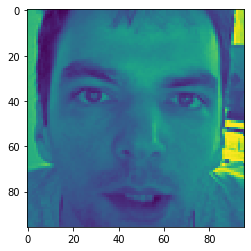

In [64]:
for imgind in range(200):
    imgind = 5
    img = xtrain[imgind]
    fig, ax = plt.subplots()
    x = range(300)
    ax.imshow(img)
    ax.scatter(history[imgind][0], history[imgind][1], color='firebrick')

    ax.scatter(ytrain["nose_tip_y"][imgind], ytrain["nose_tip_x"][imgind], color='blue')

In [65]:

lookid_data = pd.read_csv("IdLookupTable.csv")
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(result)


rowid = lookid_data['RowId']
rowid=list(rowid)



feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))









In [66]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])


rowid = pd.Series(rowid,name = 'RowId')

loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)

In [67]:
submission.to_csv('face_key_detection_submission.csv',index = False)